# Scaling

## Scaling Zillow Data

In [2]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from env import host, user, password

import warnings
warnings.filterwarnings("ignore")

In [21]:
from wrangle import wrangle_zillow 

In [ ]:
train, validate, test = wrangle_zillow()

In [ ]:
train.head()

In [ ]:
train.shape

In [ ]:
validate.shape

In [ ]:
test.shape

1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [3]:
import sklearn.preprocessing

In [ ]:
# define scaler
scaler = sklearn.preprocessing.MinMaxScaler()

In [10]:
# fit
scaler.fit(train[['tax_value', 'tax_amount']])

MinMaxScaler()

In [11]:
#use the object (use the min, max to do the transformation)
scaled_tax = scaler.transform(train[['tax_value', 'tax_amount']])
scaled_tax[:10]

array([[0.2809054 , 0.27215003],
       [0.08627978, 0.11799381],
       [0.16757702, 0.20105599],
       [0.52360035, 0.54359593],
       [0.21630677, 0.26291691],
       [0.59069657, 0.62437989],
       [0.25508403, 0.31118323],
       [0.28849701, 0.32256363],
       [0.33859702, 0.45664072],
       [0.4605844 , 0.51539807]])

In [12]:
scaled_df = pd.DataFrame(scaled_tax, index = train.index, columns = ['scaled_tax_value', 'scaled_tax_amount'])

In [13]:
scaled_df.head()

,scaled_tax_value,scaled_tax_amount
1852198,0.280905,0.272150
126219,0.086280,0.117994
855070,0.167577,0.201056
1569772,0.523600,0.543596
80997,0.216307,0.262917


In [14]:
# assign the scaled values as new columns in the train
train[['scaled_tax_value', 'scaled_tax_amount']] = scaled_tax

In [15]:
train.head()

,num_beds,num_baths,square_footage,tax_value,year_built,tax_amount,fips,scaled_tax_value,scaled_tax_amount
1852198,4.0,2.0,1986.0,267140.0,1963.0,2824.78,6111.0,0.280905,0.272150
126219,3.0,1.0,877.0,82067.0,1953.0,1235.32,6059.0,0.086280,0.117994
855070,4.0,3.0,1972.0,159374.0,1942.0,2091.75,6037.0,0.167577,0.201056
1569772,4.0,2.0,1309.0,497923.0,1956.0,5623.58,6059.0,0.523600,0.543596
80997,3.0,2.0,1512.0,205712.0,1951.0,2729.58,6037.0,0.216307,0.262917


In [16]:
# make new scaled columns for validate and test (transform only)
# test[['scaled_tax_value', 'scaled_tax_amount']] = scaler.transform(test[['tax_value', 'tax_amount']])
# validate[['scaled_tax_value', 'scaled_tax_amount']] = scaler.transform(validate[['tax_value', 'tax_amount']])

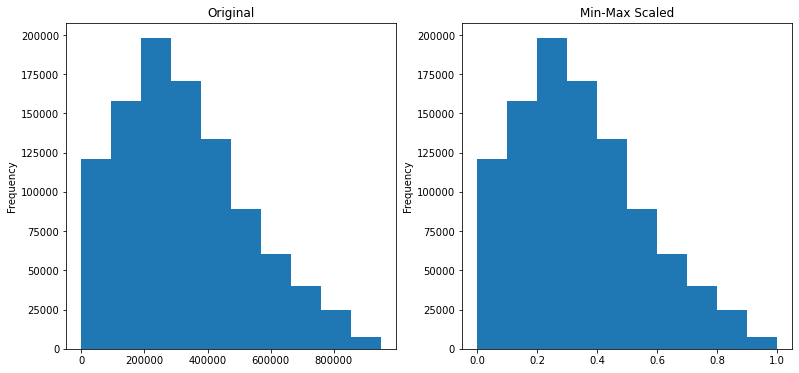

In [17]:
# Visualize the un-scaled and scaled distribution for tax_value

plt.figure(figsize=(13, 6))

# subplot 1
plt.subplot(121)
train.tax_value.plot.hist(title='Original')

#subplot 2
plt.subplot(122)
train.scaled_tax_value.plot.hist(title='Min-Max Scaled');

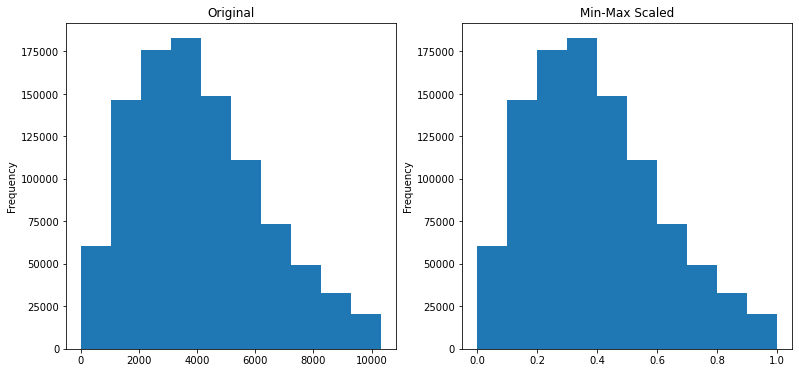

In [18]:
# Visualize the un-scaled and scaled distribution for tax_amount

plt.figure(figsize=(13, 6))

# subplot 1
plt.subplot(121)
train.tax_amount.plot.hist(title='Original')

#subplot 2
plt.subplot(122)
train.scaled_tax_amount.plot.hist(title='Min-Max Scaled');

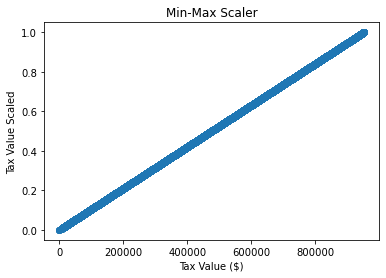

In [19]:
# Visualize the scaling tax_value:

plt.scatter(train.tax_value, train.scaled_tax_value)
plt.xlabel('Tax Value ($)')
plt.ylabel('Tax Value Scaled')
plt.title('Min-Max Scaler');

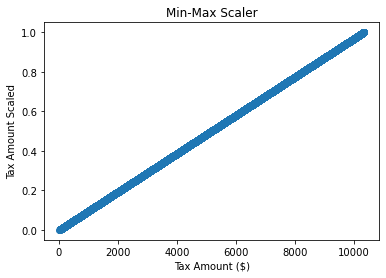

In [20]:
# Visualize the scaling tax_amount:

plt.scatter(train.tax_amount, train.scaled_tax_amount)
plt.xlabel('Tax Amount ($)')
plt.ylabel('Tax Amount Scaled')
plt.title('Min-Max Scaler');

2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?


In [21]:
scaler.inverse_transform(scaled_df)

array([[267140.  ,   2824.78],
       [ 82067.  ,   1235.32],
       [159374.  ,   2091.75],
       ...,
       [ 94398.  ,   2187.53],
       [319965.  ,   3368.8 ],
       [248384.  ,   2838.84]])

In [22]:
unscaled_df = pd.DataFrame(scaler.inverse_transform(scaled_tax), index = train.index, columns = ['tax_value', 'tax_amount'])
unscaled_df.head()

,tax_value,tax_amount
1852198,267140.0,2824.78
126219,82067.0,1235.32
855070,159374.0,2091.75
1569772,497923.0,5623.58
80997,205712.0,2729.58


3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

From https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html: 

This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

The transformation is applied on each feature independently. First an estimate of the cumulative distribution function of a feature is used to map the original values to a uniform distribution. The obtained values are then mapped to the desired output distribution using the associated quantile function. Features values of new/unseen data that fall below or above the fitted range will be mapped to the bounds of the output distribution. Note that this transform is non-linear. It may distort linear correlations between variables measured at the same scale but renders variables measured at different scales more directly comparable.

In [23]:
def visualize_scaled_date(scaler, scaler_name, feature):
    scaled = scaler.fit_transform(train[[feature]])
    fig = plt.figure(figsize = (12,6))

    gs = plt.GridSpec(2,2)

    ax1 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1,0])
    ax3 = fig.add_subplot(gs[1,1])

    ax1.scatter(train[[feature]], scaled)
    ax1.set(xlabel = feature, ylabel = 'Scaled_' + feature, title = scaler_name)

    ax2.hist(train[[feature]])
    ax2.set(title = 'Original')

    ax3.hist(scaled)
    ax3.set(title = 'Scaled_Charges')
    plt.tight_layout();

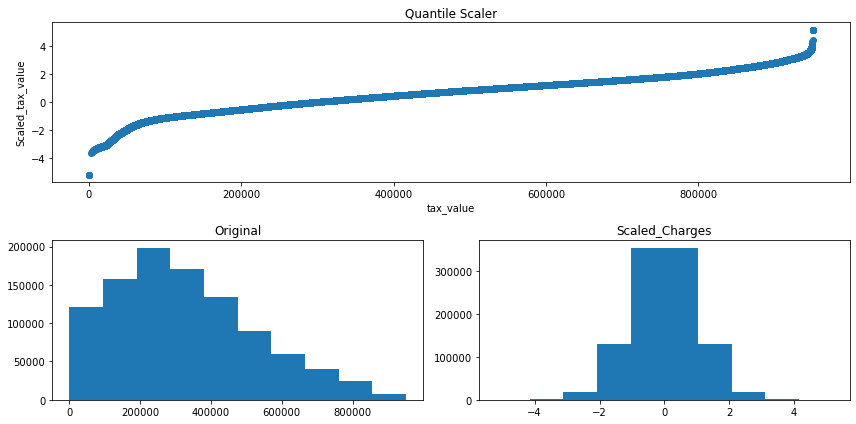

In [24]:
visualize_scaled_date(sklearn.preprocessing.QuantileTransformer(output_distribution='normal'), 'Quantile Scaler', 'tax_value')


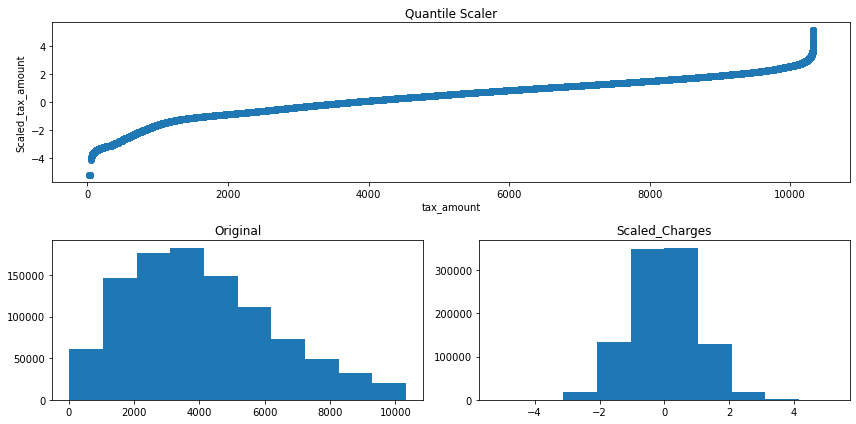

In [25]:
visualize_scaled_date(sklearn.preprocessing.QuantileTransformer(output_distribution='normal'), 'Quantile Scaler', 'tax_amount')


4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?


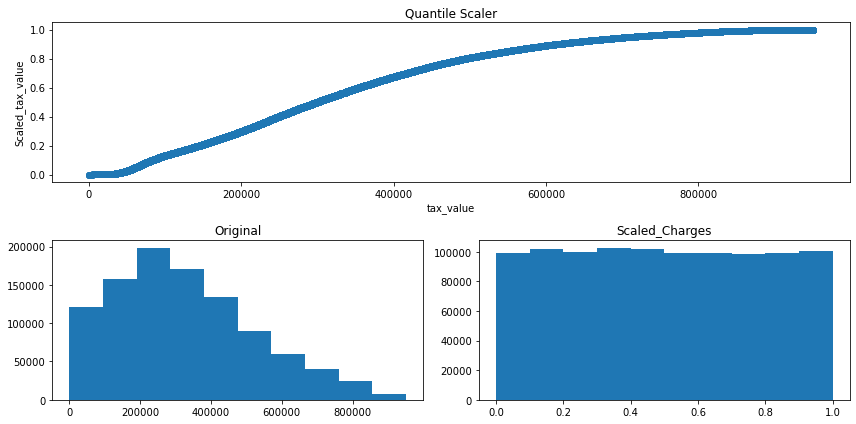

In [26]:
visualize_scaled_date(sklearn.preprocessing.QuantileTransformer(), 'Quantile Scaler', 'tax_value')

5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [15]:
from wrangle import wrangle_zillow 

In [16]:
from wrangle import split_tvt_into_variables

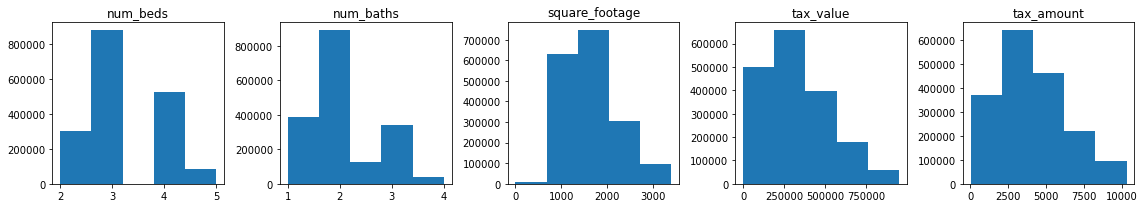

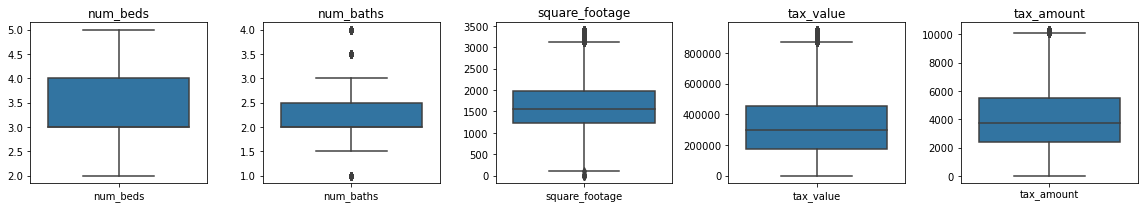

In [17]:
train, validate, test = wrangle_zillow()

In [23]:
train.shape, validate.shape, test.shape

((1002739, 7), (429746, 7), (358122, 7))

In [27]:
train.columns

Index(['num_beds', 'num_baths', 'square_footage', 'tax_value', 'year_built',
       'tax_amount', 'fips'],
      dtype='object')

In [29]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = split_tvt_into_variables(train, validate, test, target='tax_value')

In [30]:
X_train.shape

(1002739, 4)

In [31]:
X_train.head()

,num_beds,num_baths,square_footage,tax_amount
1852198,4.0,2.0,1986.0,2824.78
126219,3.0,1.0,877.0,1235.32
855070,4.0,3.0,1972.0,2091.75
1569772,4.0,2.0,1309.0,5623.58
80997,3.0,2.0,1512.0,2729.58


In [32]:
X_train.dtypes

num_beds          float64
num_baths         float64
square_footage    float64
tax_amount        float64
dtype: object

In [33]:
def Min_Max_Scaler(X_train, X_validate, X_test):
    """
    Takes in X_train, X_validate and X_test dfs with numeric values only
    Returns scaler, X_train_scaled, X_validate_scaled, X_test_scaled dfs 
    """
    #Fit the thing
    scaler = sklearn.preprocessing.MinMaxScaler().fit(X_train)
    
    #transform the thing
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), index = X_validate.index, columns = X_validate.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled

In [34]:
scaler, X_train_scaled, X_validate_scaled, X_test_scaled = Min_Max_Scaler(X_train, X_validate, X_test)

In [35]:
X_train_scaled.shape

(1002739, 4)

In [36]:
#--------VISUALIZE THE SCALED DATA
def visualize_scaled_date(scaler, scaler_name, feature):
    scaled = scaler.fit_transform(train[[feature]])
    fig = plt.figure(figsize = (12,6))

    gs = plt.GridSpec(2,2)

    ax1 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1,0])
    ax3 = fig.add_subplot(gs[1,1])

    ax1.scatter(train[[feature]], scaled)
    ax1.set(xlabel = feature, ylabel = 'Scaled' + feature, title = scaler_name)

    ax2.hist(train[[feature]])
    ax2.set(title = 'Original')

    ax3.hist(scaled)
    ax3.set(title = 'Scaled')
    plt.tight_layout();

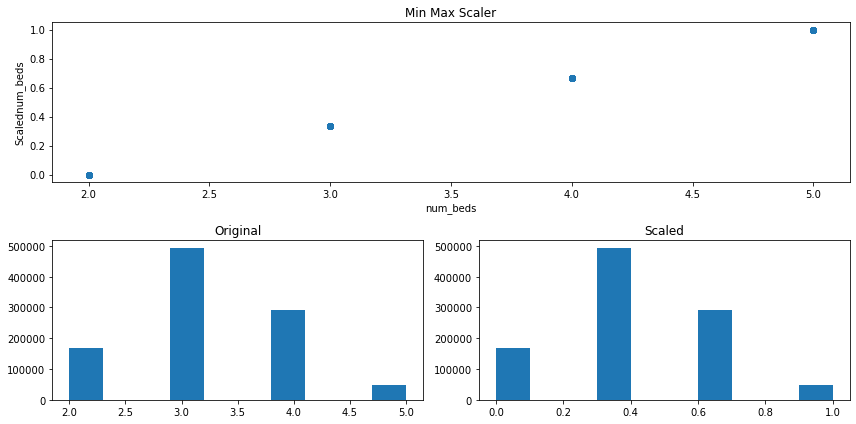

In [37]:
visualize_scaled_date(sklearn.preprocessing.MinMaxScaler(), 'Min Max Scaler', 'num_beds')


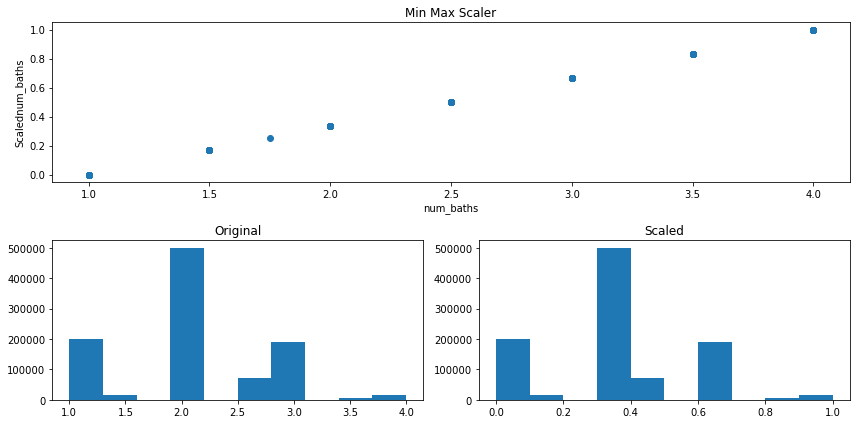

In [38]:
visualize_scaled_date(sklearn.preprocessing.MinMaxScaler(), 'Min Max Scaler', 'num_baths')

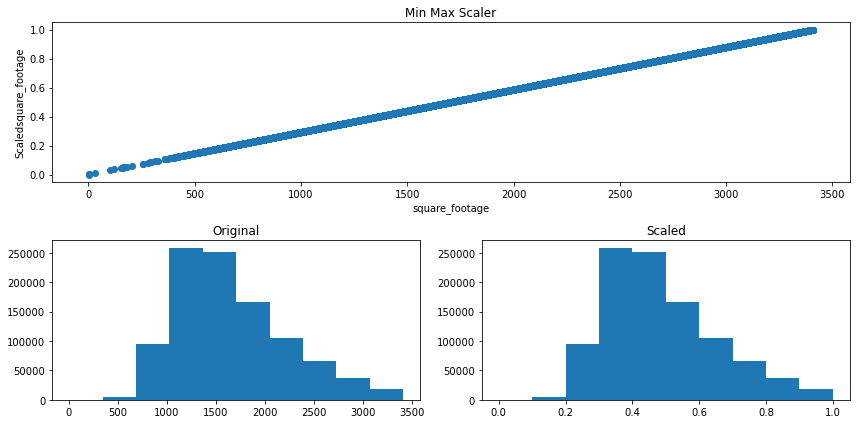

In [39]:
visualize_scaled_date(sklearn.preprocessing.MinMaxScaler(), 'Min Max Scaler', 'square_footage')

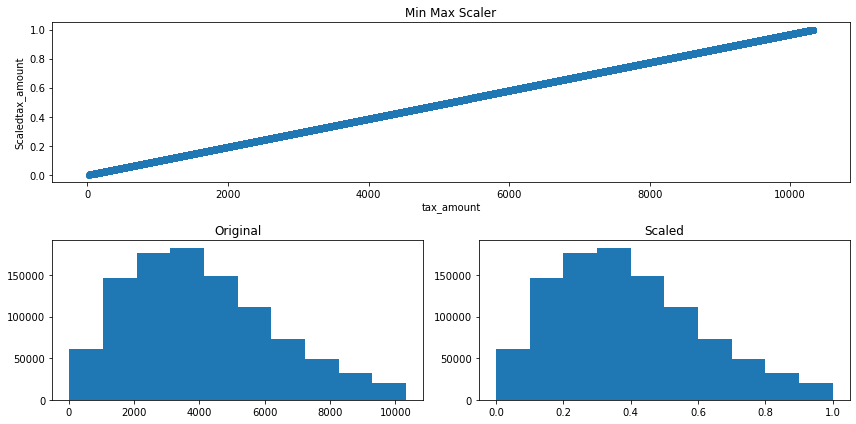

In [40]:
visualize_scaled_date(sklearn.preprocessing.MinMaxScaler(), 'Min Max Scaler', 'tax_amount')